In [2]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model


Using TensorFlow backend.


In [3]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [7]:
def define_discriminator(in_shape = (28, 28, 1)):
  model = Sequential()
  model.add(Conv2D(64,(3, 3), strides = (2,2), padding = 'same', input_shape = in_shape)) # stride of 2 is used from downsampling(instead of pooling)
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), strides = (2,2), padding = 'same'))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation = 'sigmoid'))
  # compile model
  opt = Adam(lr = 0.0002, beta_1 = 0.5)
  model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
  return model

# Define model
model = define_discriminator()
# Summarize model
model.summary()
# Plot the model
plot_model(model, to_file = '/content/drive/My Drive/Colab Notebooks/descriminator_oplot.png', show_shapes = True, show_layer_names = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
__________

The following 2 cells display the `plot of the model` the latter is way better than the former.

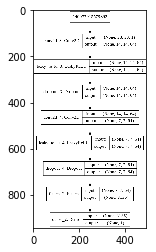

In [12]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/descriminator_oplot.png')
imgplot = plt.imshow(img)

plt.show()


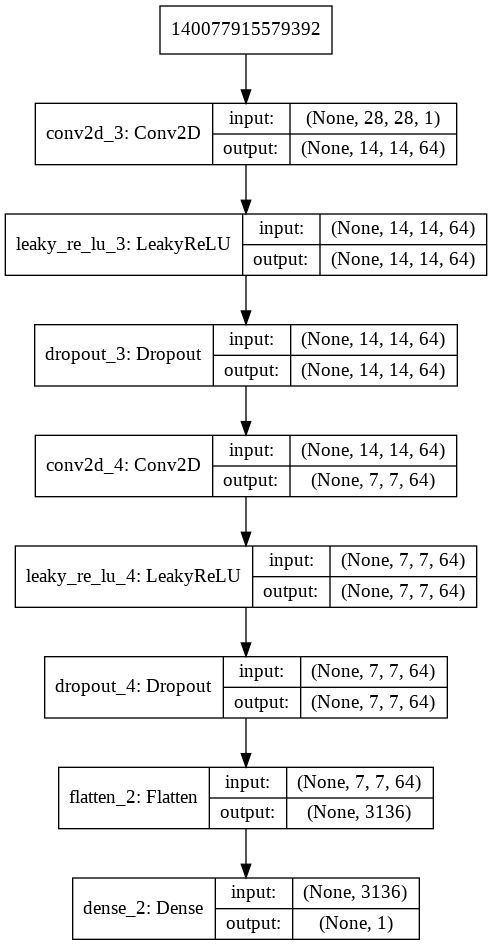

In [13]:
# To display with good clarity
from IPython.display import Image
Image(retina=True, filename='/content/drive/My Drive/Colab Notebooks/descriminator_oplot.png')